# Comparison of Precipitation Between Cities
#### Where is it rainier? Seattle, WA or Springfield, OR?
We will attempt to answer this question by comparing precipitation data from NOAA NCEI collected at local weather stations between 01-01-2018 and 12-31-2022.
We will begin by assessing the selected data sets, preparing them for appropriate use, and then analyzing the data, generating graphic and basic statistical measures to inform a conclusion.

## Processing Data
### Import Libraries
We will import some integral python packages: numpy for numerical computing, pandas for wrangling tabular data, matplotlib.pyplot for graphics, seaborn for improved visualization.

In [379]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plotting style
sns.set_style("whitegrid")

### Load the Data

Let's collect the Seattle and Springfield data from my Github repository.

In [380]:
df_seattle = pd.read_csv(
    'https://raw.githubusercontent.com/brian-fischer/DATA-5100/main/weather/seattle_rain.csv'
)

In [381]:
df_springfield = pd.read_csv(
    'https://raw.githubusercontent.com/ejbergevin/Data5100_weather/refs/heads/main/data/springfield_rain.csv'
)

### Explore the Data

Let's explore the first few records in the Seattle data.

In [382]:
df_seattle.head(10)

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/1/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/2/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/3/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/4/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/5/18,NaN,NaN,0.25,NaN,NaN,NaN,NaN
5,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/6/18,NaN,NaN,0.57,NaN,NaN,NaN,NaN
6,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/7/18,NaN,NaN,0.23,NaN,NaN,NaN,NaN
7,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/8/18,NaN,NaN,0.41,NaN,NaN,NaN,NaN
8,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",3/12/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
9,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",3/13/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN


In [383]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1658 non-null   object 
 1   NAME     1658 non-null   object 
 2   DATE     1658 non-null   object 
 3   DAPR     23 non-null     float64
 4   MDPR     23 non-null     float64
 5   PRCP     1636 non-null   float64
 6   SNOW     353 non-null    float64
 7   SNWD     66 non-null     float64
 8   WESD     15 non-null     float64
 9   WESF     28 non-null     float64
dtypes: float64(7), object(3)
memory usage: 129.7+ KB


Observe station code, the name of station, an unformatted date field, and several additional fields with missing values. The PRCP field is our key precipitation variable. Now let's peek at the Springfield data.

In [384]:
df_springfield.head(10)

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
0,US1ORLA0122,"SPRINGFIELD 1.5 SE, OR US",2018-01-01,NaN,NaN,0.02,NaN,NaN
1,US1ORLA0122,"SPRINGFIELD 1.5 SE, OR US",2018-01-02,NaN,NaN,0.00,0.0,NaN
2,US1ORLA0122,"SPRINGFIELD 1.5 SE, OR US",2018-01-03,NaN,NaN,0.00,0.0,NaN
3,US1ORLA0122,"SPRINGFIELD 1.5 SE, OR US",2018-01-04,NaN,NaN,0.02,NaN,NaN
4,US1ORLA0122,"SPRINGFIELD 1.5 SE, OR US",2018-01-05,NaN,NaN,0.13,NaN,NaN
5,US1ORLA0122,"SPRINGFIELD 1.5 SE, OR US",2018-01-06,NaN,NaN,0.17,NaN,NaN
6,US1ORLA0122,"SPRINGFIELD 1.5 SE, OR US",2018-01-07,NaN,NaN,0.00,0.0,NaN
7,US1ORLA0122,"SPRINGFIELD 1.5 SE, OR US",2018-01-08,NaN,NaN,0.00,0.0,NaN
8,US1ORLA0122,"SPRINGFIELD 1.5 SE, OR US",2018-01-09,NaN,NaN,0.50,NaN,NaN
9,US1ORLA0122,"SPRINGFIELD 1.5 SE, OR US",2018-01-10,NaN,NaN,0.36,NaN,NaN


In [385]:
df_springfield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67375 entries, 0 to 67374
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  67375 non-null  object 
 1   NAME     67375 non-null  object 
 2   DATE     67375 non-null  object 
 3   DAPR     1358 non-null   float64
 4   MDPR     1344 non-null   float64
 5   PRCP     65993 non-null  float64
 6   SNOW     33828 non-null  float64
 7   SNWD     6419 non-null   float64
dtypes: float64(5), object(3)
memory usage: 4.1+ MB


Observe similar information, but a differently formatted date, and fewer overall fields. Additionally, Springfield has many more records than Seattle. Let's figure out why.

### Understand the Data

Let's take a peek at the unique values of station for Springfield.

In [386]:
df_springfield['STATION'].unique()

array(['US1ORLA0122', 'US1ORLA0166', 'US1ORLA0087', 'US1ORLA0044',
       'US1ORLA0121', 'US1ORLA0041', 'US1ORLA0085', 'US1ORLA0042',
       'US1ORLA0086', 'US1ORLA0083', 'US1ORLA0160', 'US1ORLA0081',
       'US1ORLA0209', 'US1ORLA0208', 'US1ORLA0007', 'US1ORLA0205',
       'USW00024221', 'US1ORLA0129', 'US1ORLA0206', 'US1ORLA0126',
       'US1ORLA0203', 'US1ORLA0127', 'US1ORLA0036', 'US1ORLA0234',
       'US1ORLA0235', 'US1ORLA0112', 'US1ORLA0197', 'US1ORLA0198',
       'US1ORLA0072', 'US1ORLA0194', 'US1ORLA0191', 'US1ORLA0190',
       'US1ORLA0118', 'US1ORLA0239', 'US1ORLA0038', 'US1ORLA0236',
       'US1ORLA0026', 'US1ORLA0103', 'US1ORLA0024', 'US1ORLA0101',
       'US1ORLA0189', 'US1ORLA0222', 'US1ORLA0021', 'US1ORLA0065',
       'US1ORLA0186', 'US1ORLA0066', 'US1ORLA0020', 'US1ORLA0180',
       'US1ORLN0081', 'US1ORLA0229', 'USC00352867', 'US1ORLA0104',
       'US1ORLA0225', 'US1ORLA0179', 'US1ORLA0212', 'US1ORLA0056',
       'US1ORLA0210', 'US1ORLA0013', 'US1ORLA0057', 'US1ORLA00

In [387]:
df_springfield['STATION'].nunique()

68

In [388]:
df_springfield.groupby('STATION')['STATION'].size()

STATION
US1ORLA0007    1820
US1ORLA0013    1587
US1ORLA0017    1404
US1ORLA0020     323
US1ORLA0021       2
               ... 
US1ORLA0236     393
US1ORLA0239     122
US1ORLN0081    1053
USC00352867    1682
USW00024221    1826
Name: STATION, Length: 68, dtype: int64

We have 68 unique stations in Springfield with various record counts... And in Seattle?

In [389]:
df_seattle['STATION'].unique()

array(['US1WAKG0225'], dtype=object)

In [390]:
df_seattle['STATION'].nunique()

1

In [391]:
df_seattle.groupby('STATION')['STATION'].size()

STATION
US1WAKG0225    1658
Name: STATION, dtype: int64

We have only one unique station with around 1700 records. This explains the large difference in record counts between the data sets. Let's also confirm that our data covers the date range we expect. In order to avoid the misinterpretation of DATE and its order, we cast both data sets DATE field to explicitly date type.

In [392]:
df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])
df_springfield['DATE'] = pd.to_datetime(df_springfield['DATE'])

C:\Users\ejber\AppData\Local\Temp\ipykernel_9940\4047229948.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])


In [393]:
df_seattle['DATE'].agg(['min','max'])

min   2018-01-01
max   2022-12-31
Name: DATE, dtype: datetime64[ns]

In [394]:
df_springfield['DATE'].agg(['min','max'])

min   2018-01-01
max   2022-12-31
Name: DATE, dtype: datetime64[ns]

Both data sets run our expected range.

### Visualizing the Data

By peeking at the plotted data for Seattle, we notice there are some missing points around early 2018.

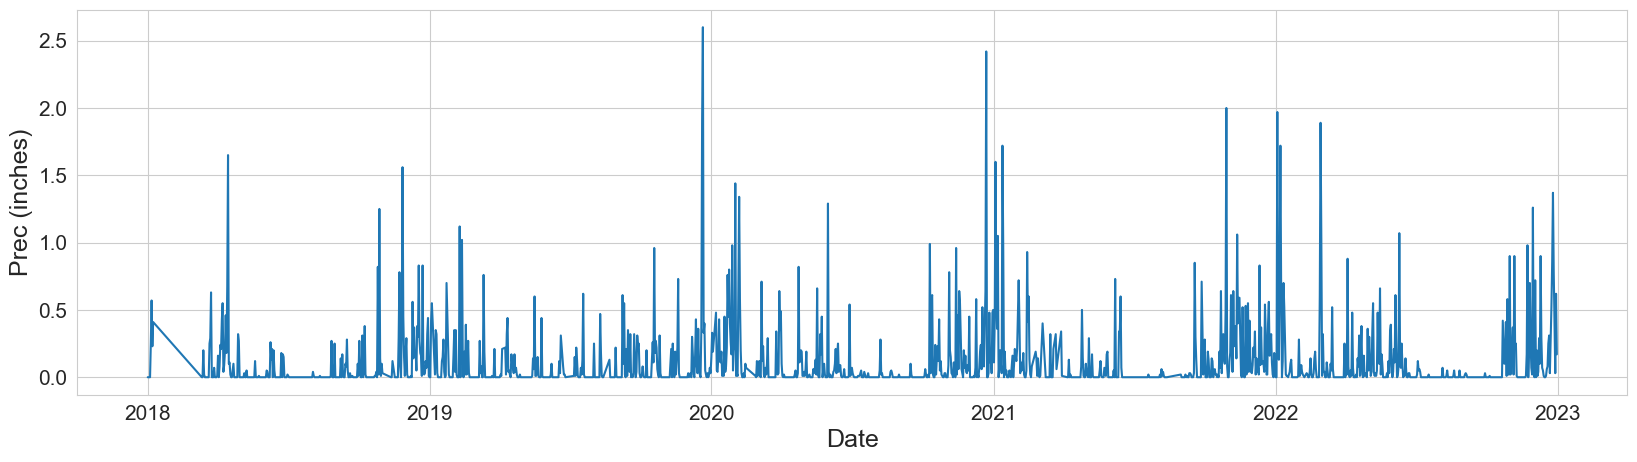

In [395]:
plt.figure(figsize=(20,5))

sns.lineplot(data=df_seattle, x = 'DATE', y='PRCP')

plt.xlabel('Date', fontsize=18)
plt.ylabel('Prec (inches)', fontsize=18)

plt.tick_params(labelsize=15)

plt.show()

We can do the same for Springfield, but but because there are so many data points, generating is time intensive and does not visually reveal missing values. I have commented out the logic below. We will need to address the NaNs for both cities.

In [396]:
# plt.figure(figsize=(20,5))

# sns.lineplot(data=df_springfield, x = 'DATE', y='PRCP')

# plt.xlabel('Date', fontsize=18)
# plt.ylabel('Prec (inches)', fontsize=18)

# plt.tick_params(labelsize=15)

# plt.show()

### Subsetting the Data

To work with just one random station from Springfield, we'll filter down to just those records.

In [397]:
df_sf_station = df_springfield.loc[df_springfield['STATION'] == 'US1ORLA0122']
df_sf_station.groupby('STATION')['STATION'].size()

STATION
US1ORLA0122    1812
Name: STATION, dtype: int64

Now we have data for Springfield comparable in size to the Seattle set.

### Joining the Data

We will combine both datasets into one frame utilizing the date field as the joining key.

In [398]:
df_joined = df_seattle[['DATE','PRCP']].merge(df_sf_station[['DATE','PRCP']], on='DATE', how='outer')
df_joined.head()

,DATE,PRCP_x,PRCP_y
0,2018-01-01,0.00,0.02
1,2018-01-02,0.00,0.00
2,2018-01-03,0.00,0.00
3,2018-01-04,0.00,0.02
4,2018-01-05,0.25,0.13


Peeking at the head of our new joined set, we can see the result is not tidy, but wide format, with columns for numerical values by a discrete cetegory (city).

### Tidying the Data

We can unpivot the data creating a new categorical field for city to collapse the two precipitation fields.

In [399]:
df_tidy = pd.melt(df_joined, id_vars = 'DATE', var_name = 'CITY', value_name='PRECIPITATION')
df_tidy.head()

,DATE,CITY,PRECIPITATION
0,2018-01-01,PRCP_x,0.00
1,2018-01-02,PRCP_x,0.00
2,2018-01-03,PRCP_x,0.00
3,2018-01-04,PRCP_x,0.00
4,2018-01-05,PRCP_x,0.25


Npw we have long form tidy data. We rename the categorical city values to be clearer.

In [400]:
df_tidy.loc[df_tidy['CITY'] == 'PRCP_x', 'CITY'] = 'SPF'
df_tidy.loc[df_tidy['CITY'] == 'PRCP_y', 'CITY'] = 'SEA'
df_tidy

,DATE,CITY,PRECIPITATION
0,2018-01-01,SPF,0.00
1,2018-01-02,SPF,0.00
2,2018-01-03,SPF,0.00
3,2018-01-04,SPF,0.00
4,2018-01-05,SPF,0.25
...,...,...,...
3639,2022-12-27,SEA,1.22
3640,2022-12-28,SEA,1.28
3641,2022-12-29,SEA,0.27
3642,2022-12-30,SEA,0.32


### Imputing the Data
Imputing means creating missing data.
Let's start by checking how much data is missing...

In [401]:
df_tidy.notna().sum()

DATE             3644
CITY             3644
PRECIPITATION    3445
dtype: int64

In [402]:
df_tidy.isna().sum()

DATE               0
CITY               0
PRECIPITATION    199
dtype: int64

We have missing precipitation values between the joined data sets. Let's see the split between Seattle and Springfield.

In [403]:
df_tidy.loc[df_tidy['CITY'] == 'SEA', 'PRECIPITATION'].isna().sum()

13

In [404]:
df_tidy.loc[df_tidy['CITY'] == 'SEA', 'PRECIPITATION'].notna().sum()

1809

In [405]:
df_tidy.loc[df_tidy['CITY'] == 'SEA', 'PRECIPITATION'].size

1822

In [406]:
df_tidy.loc[df_tidy['CITY'] == 'SPF', 'PRECIPITATION'].isna().sum()

186

In [407]:
df_tidy.loc[df_tidy['CITY'] == 'SPF', 'PRECIPITATION'].notna().sum()

1636

In [408]:
df_tidy.loc[df_tidy['CITY'] == 'SPF', 'PRECIPITATION'].size

1822

So there are a far more missing precip values for Springfield. How many full datapoints should we be expecting for each set? Jan 01 2018 to Dec 31 2022 is 5 years.

In [409]:
5 * 365 + 1

1826

Total should be twice that (for two cities).

In [410]:
2 * (5 * 365 + 1)

3652

Reminder: the total length of our data set is less than that.

In [411]:
df_tidy['PRECIPITATION'].size

3644

So we're missing some dates from both sets. To determine them, we will build a dataframe of all expected dates in the period.

In [412]:
df_alldates = pd.date_range(start='01-Jan-2018', end='31-Dec-2022', freq='D', name='DATE').to_frame(index=False)
df_alldates

,DATE
0,2018-01-01
1,2018-01-02
2,2018-01-03
3,2018-01-04
4,2018-01-05
...,...
1821,2022-12-27
1822,2022-12-28
1823,2022-12-29
1824,2022-12-30


And then let's make a frame for our cities.

In [413]:
df_cities = pd.DataFrame(columns = ["CITY"], data=[['SEA'],['SPF']])

So now we can cross join the two dataframes we just constructed to create a combo of each city with each date.

In [414]:
df_citydate = df_cities.merge(df_alldates, how='cross')
df_citydate

,CITY,DATE
0,SEA,2018-01-01
1,SEA,2018-01-02
2,SEA,2018-01-03
3,SEA,2018-01-04
4,SEA,2018-01-05
...,...,...
3647,SPF,2022-12-27
3648,SPF,2022-12-28
3649,SPF,2022-12-29
3650,SPF,2022-12-30


Now we can outer join our expected data with what we actually have to determine the missing dates. The dates and the cities make up the join key.

In [415]:
df_tidy_a = pd.merge(df_tidy, df_citydate, on=['DATE','CITY'], how='outer').sort_values(['CITY','DATE']).reset_index(drop=True)
df_tidy_a

,DATE,CITY,PRECIPITATION
0,2018-01-01,SEA,0.02
1,2018-01-02,SEA,0.00
2,2018-01-03,SEA,0.00
3,2018-01-04,SEA,0.02
4,2018-01-05,SEA,0.13
...,...,...,...
3647,2022-12-27,SPF,0.78
3648,2022-12-28,SPF,0.40
3649,2022-12-29,SPF,0.03
3650,2022-12-30,SPF,0.62


And we can see that we do in fact have the 3652 records we are expecting. Now, let's consider how to treat all those missing values. 

In [416]:
df_tidy_a.loc[df_tidy_a['PRECIPITATION'].isna()]

,DATE,CITY,PRECIPITATION
37,2018-02-07,SEA,NaN
38,2018-02-08,SEA,NaN
39,2018-02-09,SEA,NaN
490,2019-05-06,SEA,NaN
549,2019-07-04,SEA,NaN
...,...,...,...
3368,2022-03-23,SPF,NaN
3369,2022-03-24,SPF,NaN
3370,2022-03-25,SPF,NaN
3371,2022-03-26,SPF,NaN


But that will likely be too broad a mean. Let's use the mean by day of year for each city set. There should be nearly five instances of each day in each city. We will need a day of year column calculated from the date column.

In [417]:
df_tidy_a['DAY_OF_YEAR'] = pd.DatetimeIndex(df_tidy_a['DATE']).day_of_year
df_tidy_a

,DATE,CITY,PRECIPITATION,DAY_OF_YEAR
0,2018-01-01,SEA,0.02,1
1,2018-01-02,SEA,0.00,2
2,2018-01-03,SEA,0.00,3
3,2018-01-04,SEA,0.02,4
4,2018-01-05,SEA,0.13,5
...,...,...,...,...
3647,2022-12-27,SPF,0.78,361
3648,2022-12-28,SPF,0.40,362
3649,2022-12-29,SPF,0.03,363
3650,2022-12-30,SPF,0.62,364


Now let's create a dataframe of just averages in appropriate groups. We will name the average precipication field uniquely.

In [418]:
df_daycityavg = pd.DataFrame(df_tidy_a.groupby(['CITY','DAY_OF_YEAR'])['PRECIPITATION'].mean()).reset_index()
df_daycityavg.rename(columns={'PRECIPITATION':'AVG'}, inplace=True)
df_daycityavg

,CITY,DAY_OF_YEAR,AVG
0,SEA,1,0.128
1,SEA,2,0.084
2,SEA,3,0.242
3,SEA,4,0.438
4,SEA,5,0.312
...,...,...,...
727,SPF,362,0.120
728,SPF,363,0.102
729,SPF,364,0.268
730,SPF,365,0.140


Now we can apply the averages to our existing larger dataframe. We can join them in.

In [419]:
df_w_avg = pd.merge(df_tidy_a, df_daycityavg, on=['DAY_OF_YEAR','CITY'], how='inner').sort_values(['CITY','DATE']).reset_index(drop=True)
df_w_avg

,DATE,CITY,PRECIPITATION,DAY_OF_YEAR,AVG
0,2018-01-01,SEA,0.02,1,0.128
1,2018-01-02,SEA,0.00,2,0.084
2,2018-01-03,SEA,0.00,3,0.242
3,2018-01-04,SEA,0.02,4,0.438
4,2018-01-05,SEA,0.13,5,0.312
...,...,...,...,...,...
3647,2022-12-27,SPF,0.78,361,0.304
3648,2022-12-28,SPF,0.40,362,0.120
3649,2022-12-29,SPF,0.03,363,0.102
3650,2022-12-30,SPF,0.62,364,0.268


In [420]:
df_w_avg[30:40]

,DATE,CITY,PRECIPITATION,DAY_OF_YEAR,AVG
30,2018-01-31,SEA,0.07,31,0.1040
31,2018-02-01,SEA,0.00,32,0.0820
32,2018-02-02,SEA,0.03,33,0.1600
33,2018-02-03,SEA,0.04,34,0.3400
34,2018-02-04,SEA,0.00,35,0.0640
35,2018-02-05,SEA,0.02,36,0.0800
36,2018-02-06,SEA,0.00,37,0.0500
37,2018-02-07,SEA,NaN,38,0.0100
38,2018-02-08,SEA,NaN,39,0.0625
39,2018-02-09,SEA,NaN,40,0.2425


Above, we can see the 2018-02-09 date for Seattle was missing data but now we have a complementary average. Now we create a new column holding precipitation or the average, depending on if precipitation was NaN.

In [421]:
df_w_avg.loc[df_w_avg['PRECIPITATION'].isna(), 'PRECIPITATION_OR_AVG'] = df_w_avg.loc[df_w_avg['PRECIPITATION'].isna(), 'AVG']
df_w_avg.loc[df_w_avg['PRECIPITATION'].notna(), 'PRECIPITATION_OR_AVG'] = df_w_avg.loc[df_w_avg['PRECIPITATION'].notna(), 'PRECIPITATION']

Check that missing precipitation dates use average.

In [422]:
df_w_avg[30:40]

,DATE,CITY,PRECIPITATION,DAY_OF_YEAR,AVG,PRECIPITATION_OR_AVG
30,2018-01-31,SEA,0.07,31,0.1040,0.0700
31,2018-02-01,SEA,0.00,32,0.0820,0.0000
32,2018-02-02,SEA,0.03,33,0.1600,0.0300
33,2018-02-03,SEA,0.04,34,0.3400,0.0400
34,2018-02-04,SEA,0.00,35,0.0640,0.0000
35,2018-02-05,SEA,0.02,36,0.0800,0.0200
36,2018-02-06,SEA,0.00,37,0.0500,0.0000
37,2018-02-07,SEA,NaN,38,0.0100,0.0100
38,2018-02-08,SEA,NaN,39,0.0625,0.0625
39,2018-02-09,SEA,NaN,40,0.2425,0.2425


And let's confirm there are no missing values in our final column.

In [423]:
df_w_avg['PRECIPITATION_OR_AVG'].isna().sum()

0

We will also make use of the year, month, year+month, and season as variables. Additionally, we may want to assess the binary of if the precipitation was non-zero (if it rained), so we will calculate that field as well.

In [424]:
df_w_avg['YEAR'] = df_w_avg['DATE'].dt.year.astype(str)
df_w_avg['MONTH'] = df_w_avg['DATE'].dt.month_name()
df_w_avg['MONTH_NO'] = df_w_avg['DATE'].dt.month
df_w_avg['MONTH_AND_YEAR'] =  df_w_avg['DATE'].dt.month_name() + " " + df_w_avg['DATE'].dt.year.astype(str)

season_conditions = [
    ((80 < df_w_avg['DAY_OF_YEAR']) & (df_w_avg['DAY_OF_YEAR'] <= 171)),
    ((171 < df_w_avg['DAY_OF_YEAR']) & (df_w_avg['DAY_OF_YEAR'] <= 262)),
    ((262 < df_w_avg['DAY_OF_YEAR']) & (df_w_avg['DAY_OF_YEAR'] <= 353))
]
season_values = [
    'Spring',
    'Summer',
    'Fall'
]
df_w_avg['SEASON'] = np.select(season_conditions, season_values, default='Winter')

df_w_avg

,DATE,CITY,PRECIPITATION,DAY_OF_YEAR,AVG,PRECIPITATION_OR_AVG,YEAR,MONTH,MONTH_NO,MONTH_AND_YEAR,SEASON
0,2018-01-01,SEA,0.02,1,0.128,0.02,2018,January,1,January 2018,Winter
1,2018-01-02,SEA,0.00,2,0.084,0.00,2018,January,1,January 2018,Winter
2,2018-01-03,SEA,0.00,3,0.242,0.00,2018,January,1,January 2018,Winter
3,2018-01-04,SEA,0.02,4,0.438,0.02,2018,January,1,January 2018,Winter
4,2018-01-05,SEA,0.13,5,0.312,0.13,2018,January,1,January 2018,Winter
...,...,...,...,...,...,...,...,...,...,...,...
3647,2022-12-27,SPF,0.78,361,0.304,0.78,2022,December,12,December 2022,Winter
3648,2022-12-28,SPF,0.40,362,0.120,0.40,2022,December,12,December 2022,Winter
3649,2022-12-29,SPF,0.03,363,0.102,0.03,2022,December,12,December 2022,Winter
3650,2022-12-30,SPF,0.62,364,0.268,0.62,2022,December,12,December 2022,Winter


Our data is ready for use!

### Exporting Ready Data

In [425]:
import os
os.getcwd()

'C:\\Users\\ejber\\Desktop\\Data5100\\code'

In [427]:
os.chdir('C:\\Users\\ejber\\Desktop\\Data5100\\data')

In [428]:
os.getcwd()

'C:\\Users\\ejber\\Desktop\\Data5100\\data'

In [429]:
df_w_avg.to_csv('clean_seattle_springfield_weather.csv', encoding='utf-8-sig', index=False)

## Analyzing the Data

First, we will take a look at some summary statistics by city for the full dataset.

In [430]:
desc_stats = df_w_avg.groupby('CITY')['PRECIPITATION_OR_AVG'].describe()
sum_stat = df_w_avg.groupby('CITY')['PRECIPITATION_OR_AVG'].sum().to_frame(name='sum') 
pd.concat([desc_stats, sum_stat], axis =1)

,count,mean,std,min,25%,50%,75%,max,sum
CITY,,,,,,,,,
SEA,1826.0,0.108457,0.234710,0.0,0.0,0.00,0.10,2.33,198.041667
SPF,1826.0,0.113270,0.240516,0.0,0.0,0.01,0.12,2.60,206.831667


It would immediately appear that the average rainfall in Seattle is actually less than Springfield. The median, max, and total over five years also appear lower. Let's take a look at year to year differences.

In [431]:
desc_stats = df_w_avg.groupby(['YEAR','CITY'])['PRECIPITATION_OR_AVG'].describe()
sum_stat = df_w_avg.groupby(['YEAR','CITY'])['PRECIPITATION_OR_AVG'].sum().to_frame(name='sum') 
pd.concat([desc_stats, sum_stat], axis =1)

count      mean       std  min  25%     50%     75%   max  \
YEAR CITY                                                              
2018 SEA   365.0  0.092315  0.193960  0.0  0.0  0.0000  0.0600  1.29   
     SPF   365.0  0.102039  0.197829  0.0  0.0  0.0075  0.1400  1.65   
2019 SEA   365.0  0.106260  0.242960  0.0  0.0  0.0000  0.1000  2.33   
     SPF   365.0  0.105900  0.238780  0.0  0.0  0.0100  0.1200  2.60   
2020 SEA   366.0  0.112796  0.217285  0.0  0.0  0.0000  0.1275  1.18   
     SPF   366.0  0.118092  0.249205  0.0  0.0  0.0200  0.1100  2.42   
2021 SEA   365.0  0.116130  0.259713  0.0  0.0  0.0000  0.1100  2.16   
     SPF   365.0  0.121737  0.243659  0.0  0.0  0.0200  0.1400  2.00   
2022 SEA   365.0  0.114769  0.253718  0.0  0.0  0.0000  0.0900  1.54   
     SPF   365.0  0.118571  0.268206  0.0  0.0  0.0100  0.1000  1.97   

                 sum  
YEAR CITY             
2018 SEA   33.695000  
     SPF   37.244167  
2019 SEA   38.785000  
     SPF   38.653333  
2020 SEA   41.283333  
     SPF   43.221667  
2021 SEA   42.387500  
     SPF   44.434167  
2022 SEA   41.890833  
     SPF   43.278333

We see similar trends here, with Springfield outraining Seattle in all years but 2019 (by a slight margin). A bar plot represents this well.

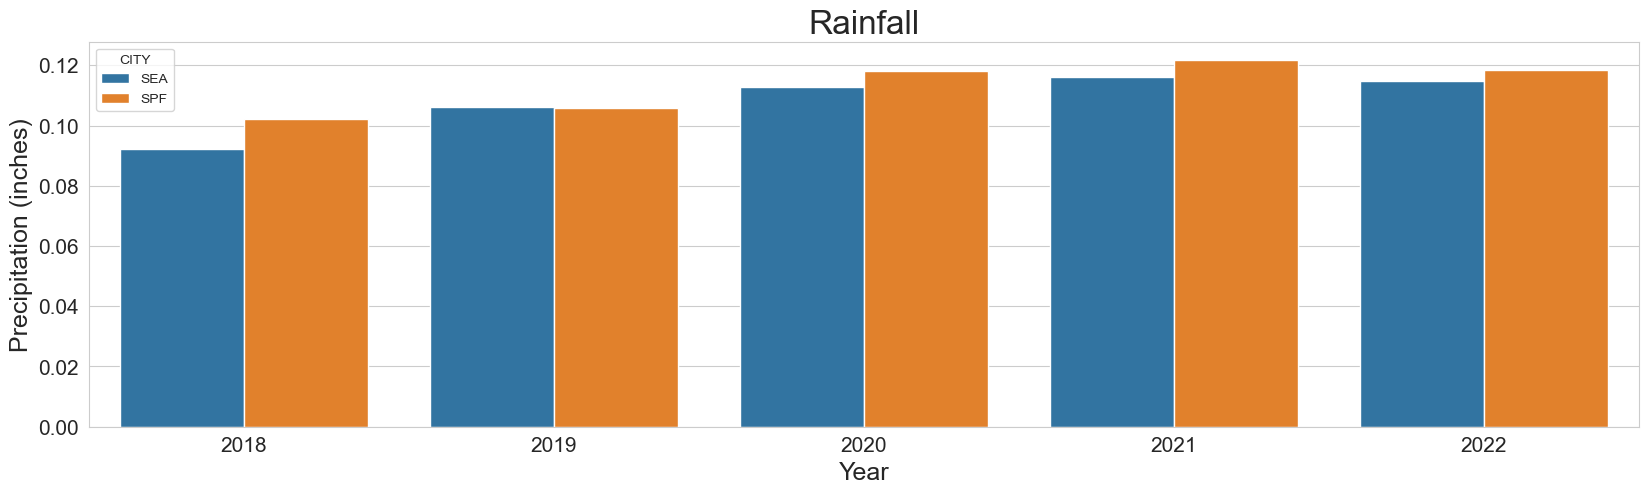

In [432]:
plt.figure(figsize=(20,5))

sns.barplot(data=df_w_avg, x = 'YEAR', y='PRECIPITATION_OR_AVG', hue = 'CITY', errorbar = None)

plt.title('Rainfall', fontsize=24)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15)

plt.show()

Let's take a look at monthly differences.

In [433]:
desc_stats = df_w_avg.groupby(['MONTH_NO','MONTH','CITY'])['PRECIPITATION_OR_AVG'].describe()
sum_stat = df_w_avg.groupby(['MONTH_NO','MONTH','CITY'])['PRECIPITATION_OR_AVG'].sum().to_frame(name='sum') 
pd.concat([desc_stats, sum_stat], axis =1)

count      mean       std  min   25%    50%  \
MONTH_NO MONTH     CITY                                                
1        January   SEA   155.0  0.191742  0.259808  0.0  0.00  0.050   
                   SPF   155.0  0.230742  0.341816  0.0  0.01  0.110   
2        February  SEA   141.0  0.153014  0.284391  0.0  0.00  0.040   
                   SPF   141.0  0.176472  0.296935  0.0  0.01  0.070   
3        March     SEA   155.0  0.112452  0.217304  0.0  0.00  0.000   
                   SPF   155.0  0.089075  0.167194  0.0  0.00  0.000   
4        April     SEA   150.0  0.143600  0.257680  0.0  0.00  0.015   
                   SPF   150.0  0.100483  0.200652  0.0  0.00  0.020   
5        May       SEA   155.0  0.095532  0.200126  0.0  0.00  0.000   
                   SPF   155.0  0.069161  0.164036  0.0  0.00  0.000   
6        June      SEA   150.0  0.071000  0.181366  0.0  0.00  0.000   
                   SPF   150.0  0.063167  0.146171  0.0  0.00  0.000   
7        July      SEA   155.0  0.001339  0.007866  0.0  0.00  0.000   
                   SPF   155.0  0.013984  0.057169  0.0  0.00  0.000   
8        August    SEA   155.0  0.004629  0.027164  0.0  0.00  0.000   
                   SPF   155.0  0.019995  0.061337  0.0  0.00  0.000   
9        September SEA   150.0  0.075933  0.224449  0.0  0.00  0.000   
                   SPF   150.0  0.055622  0.133198  0.0  0.00  0.000   
10       October   SEA   155.0  0.071333  0.159229  0.0  0.00  0.000   
                   SPF   155.0  0.118452  0.260078  0.0  0.00  0.010   
11       November  SEA   150.0  0.154250  0.304944  0.0  0.00  0.020   
                   SPF   150.0  0.201867  0.276785  0.0  0.00  0.095   
12       December  SEA   155.0  0.231032  0.331769  0.0  0.00  0.070   
                   SPF   155.0  0.224903  0.378504  0.0  0.02  0.080   

                              75%   max        sum  
MONTH_NO MONTH     CITY                             
1        January   SEA   0.315000  1.51  29.720000  
                   SPF   0.290417  1.97  35.765000  
2        February  SEA   0.210000  2.33  21.575000  
                   SPF   0.190000  1.89  24.882500  
3        March     SEA   0.130000  1.17  17.430000  
                   SPF   0.105000  1.03  13.806667  
4        April     SEA   0.210000  1.72  21.540000  
                   SPF   0.110000  1.65  15.072500  
5        May       SEA   0.085000  1.18  14.807500  
                   SPF   0.050000  1.29  10.720000  
6        June      SEA   0.020000  1.14  10.650000  
                   SPF   0.050000  1.07   9.475000  
7        July      SEA   0.000000  0.07   0.207500  
                   SPF   0.000000  0.62   2.167500  
8        August    SEA   0.000000  0.30   0.717500  
                   SPF   0.010000  0.47   3.099167  
9        September SEA   0.000000  1.65  11.390000  
                   SPF   0.030000  0.85   8.343333  
10       October   SEA   0.075000  1.25  11.056667  
                   SPF   0.120000  2.00  18.360000  
11       November  SEA   0.200000  2.16  23.137500  
                   SPF   0.283750  1.56  30.280000  
12       December  SEA   0.315000  1.54  35.810000  
                   SPF   0.305000  2.60  34.860000

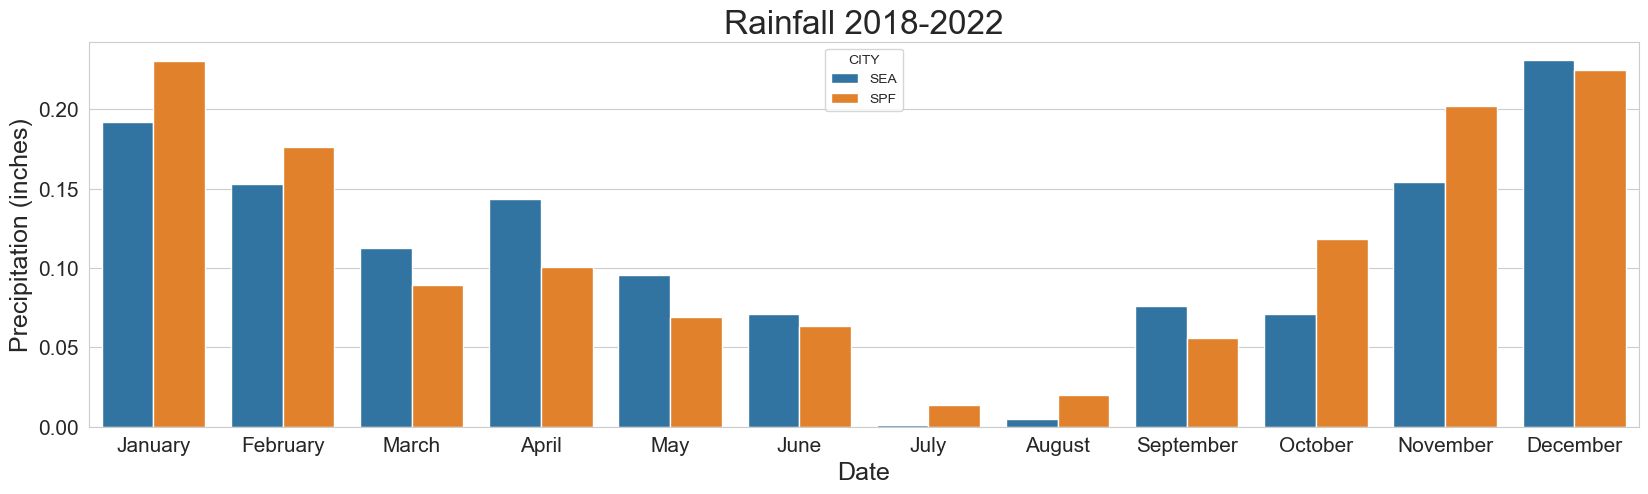

In [434]:
plt.figure(figsize=(20,5))

sns.barplot(data=df_w_avg, x = 'MONTH', y='PRECIPITATION_OR_AVG', hue = 'CITY', errorbar = None)

plt.title('Rainfall 2018-2022', fontsize=24)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15, labelrotation=0)

plt.show()

Between the summary statistics and bar plot, it is easy to recognize that Seattle does significantly outrain Springfield in certain months, particularly March, April, and May which all fall into Spring. Let's compare by season.

In [435]:
desc_stats = df_w_avg.groupby(['SEASON','CITY'])['PRECIPITATION_OR_AVG'].describe()
sum_stat = df_w_avg.groupby(['SEASON','CITY'])['PRECIPITATION_OR_AVG'].sum().to_frame(name='sum') 
pd.concat([desc_stats, sum_stat], axis =1)

count      mean       std  min  25%   50%    75%   max        sum
SEASON CITY                                                                   
Fall   SEA   455.0  0.123504  0.250486  0.0  0.0  0.00  0.150  2.16  56.194167
       SPF   455.0  0.146227  0.246420  0.0  0.0  0.03  0.195  2.00  66.533333
Spring SEA   455.0  0.116984  0.229004  0.0  0.0  0.00  0.140  1.72  53.227500
       SPF   455.0  0.086383  0.177791  0.0  0.0  0.01  0.100  1.65  39.304167
Summer SEA   455.0  0.018011  0.113958  0.0  0.0  0.00  0.000  1.65   8.195000
       SPF   455.0  0.025256  0.084729  0.0  0.0  0.00  0.010  0.85  11.491667
Winter SEA   461.0  0.174458  0.281612  0.0  0.0  0.04  0.240  2.33  80.425000
       SPF   461.0  0.194149  0.339536  0.0  0.0  0.06  0.230  2.60  89.502500

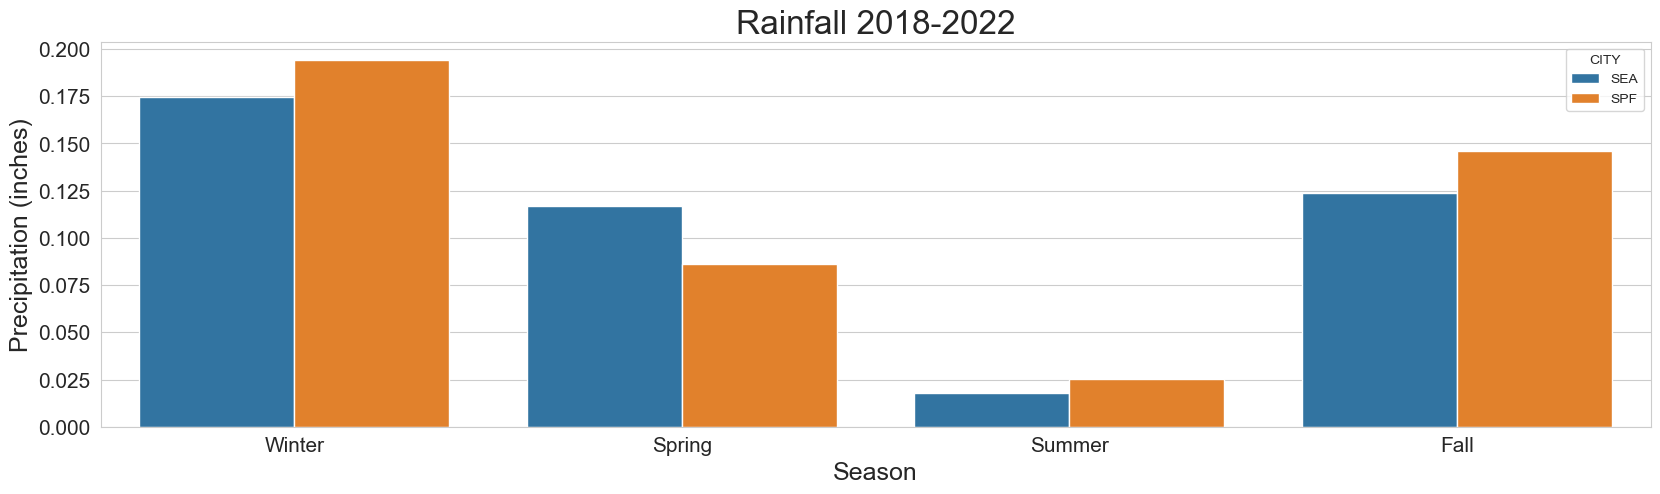

In [436]:
plt.figure(figsize=(20,5))

sns.barplot(data=df_w_avg, x = 'SEASON', y='PRECIPITATION_OR_AVG', hue = 'CITY', errorbar = None)

plt.title('Rainfall 2018-2022', fontsize=24)
plt.xlabel('Season', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15, labelrotation=0)

plt.show()

Indeed Seattle outrains Springfield seasonally in the spring. We can zoom out to visualize each day between cities in hopes of seeing a clear domination...

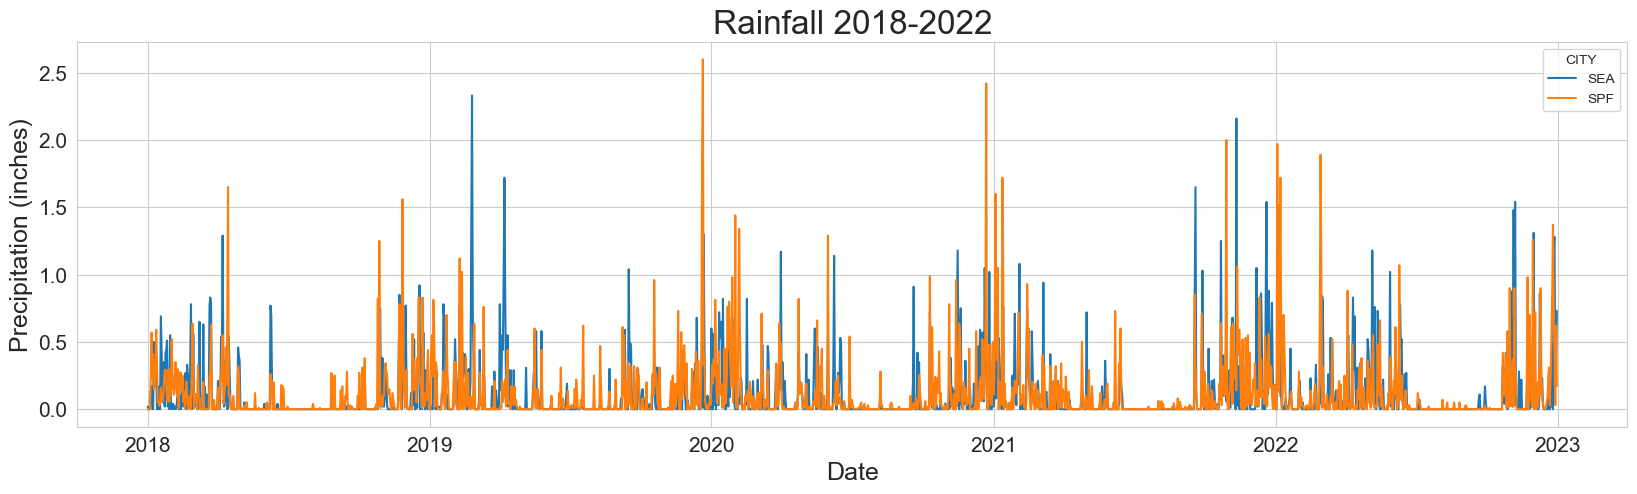

In [437]:
plt.figure(figsize=(20,5))

sns.lineplot(data=df_w_avg, x = 'DATE', y='PRECIPITATION_OR_AVG', hue = 'CITY')

plt.title('Rainfall 2018-2022', fontsize=24)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15)

plt.show()

But due to the amount of data and thin margin of difference, it is difficult to understand much from this image besides the presence of sharp annual spikes from both Seattle and Springfield. If we utilize a similar line plot by month's sum precipiation...

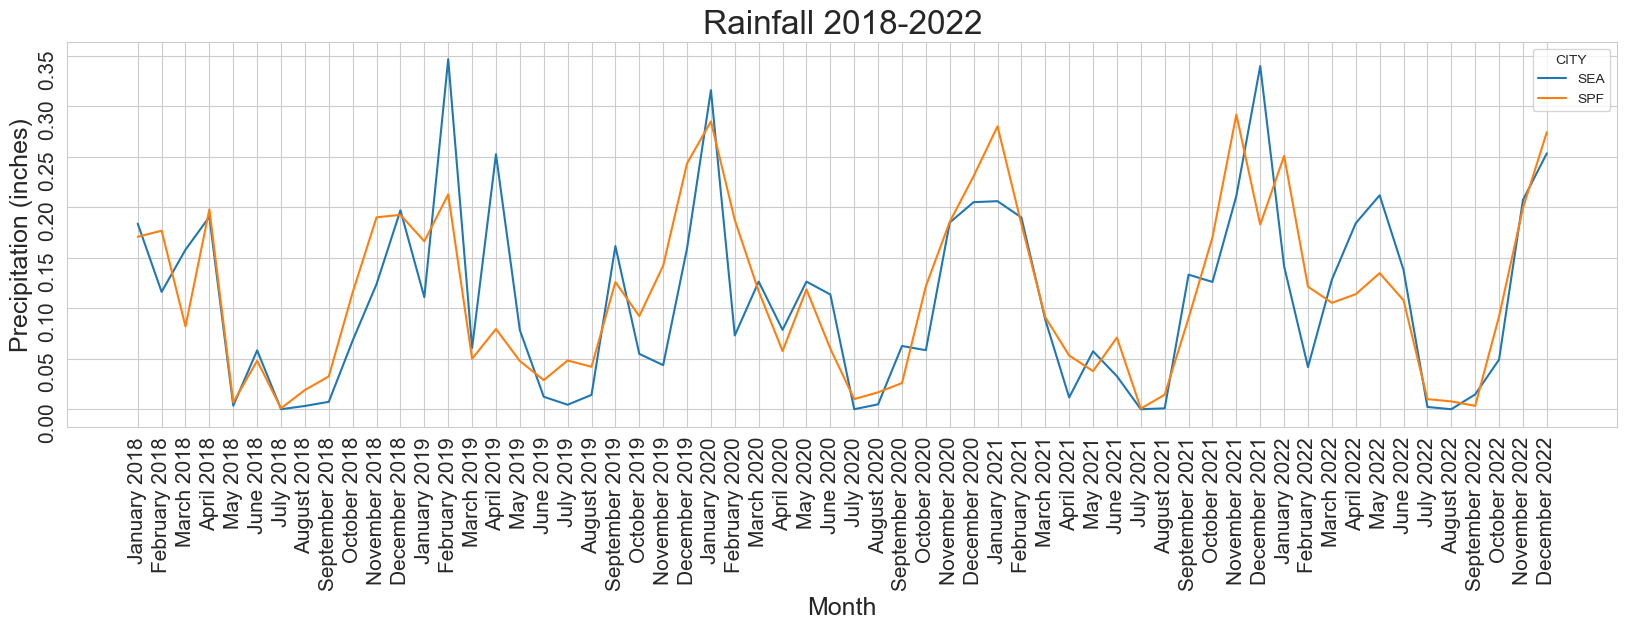

In [438]:
plt.figure(figsize=(20,5))

sns.lineplot(data=df_w_avg, x = 'MONTH_AND_YEAR', y='PRECIPITATION_OR_AVG', hue = 'CITY', errorbar = None)

plt.title('Rainfall 2018-2022', fontsize=24)
plt.xlabel('Month', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15, labelrotation=90)

plt.show()

We rediscover the peak Seattle rainfall which tends to outperform Springfield in the winter and spring months. Despite the highest monthly totals being held by Seattle, we already know that the max daily precipitation value belongs to Springfield, and understandably it's standard deviation is also greater. Let's explore the distributions of the daily fall with a histogram. 

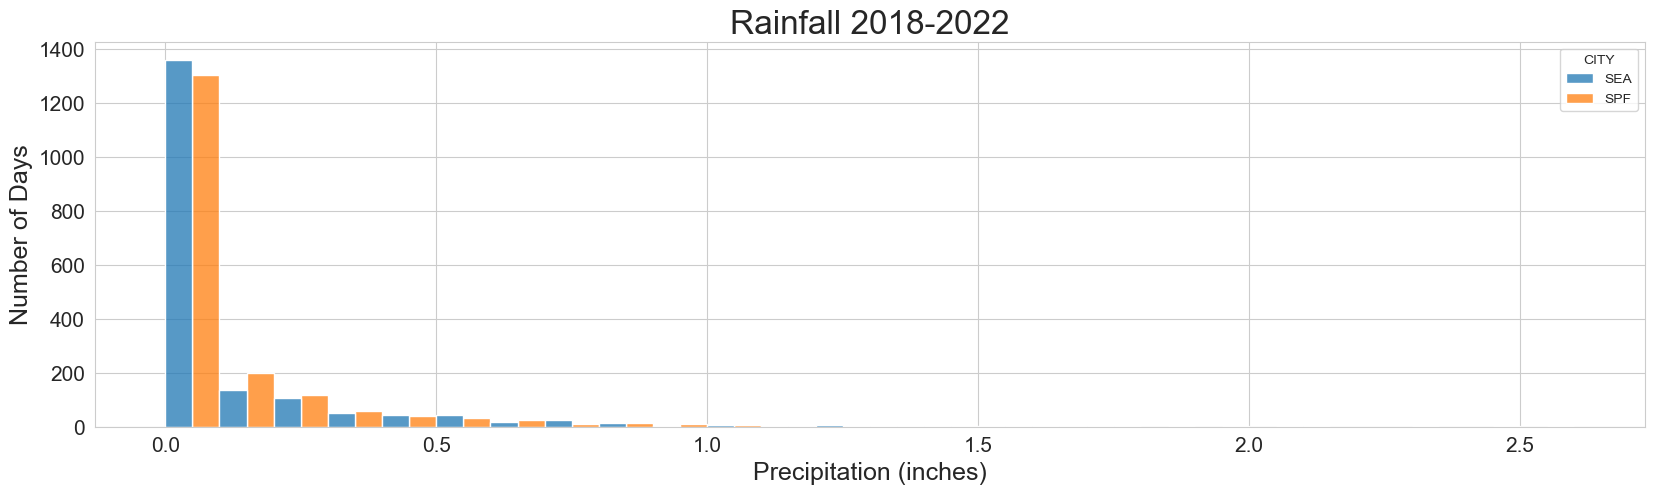

In [444]:
plt.figure(figsize=(20,5))

sns.histplot(data=df_w_avg, x = 'PRECIPITATION_OR_AVG', hue = 'CITY', binwidth=.1, multiple = 'dodge')

plt.title('Rainfall 2018-2022', fontsize=24)
plt.xlabel('Precipitation (inches)', fontsize=18)
plt.ylabel('Number of Days', fontsize=18)

plt.tick_params(labelsize=15)

plt.show()

We see that both cities' precipitation rates skew heavily right, explained by the high number of no rain days. Surprisingly, Seattle shows a greater number of no rain days than Springfield. We cannot determine the great value from this very thin view of the right tail, so we can recreate this histogram utilizing only daily precipitation values greater than one inch.

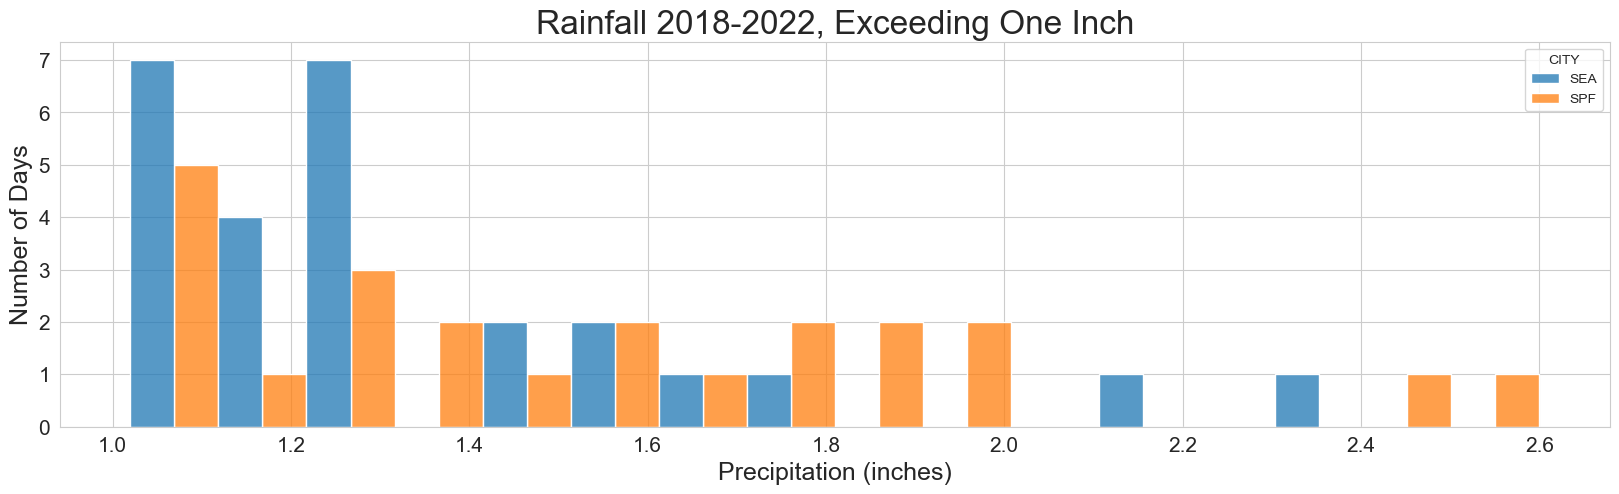

In [445]:
plt.figure(figsize=(20,5))

sns.histplot(df_w_avg[df_w_avg['PRECIPITATION_OR_AVG'] > 1], x = 'PRECIPITATION_OR_AVG', hue = 'CITY', binwidth=.1, multiple = 'dodge')

plt.title('Rainfall 2018-2022, Exceeding One Inch', fontsize=24)
plt.xlabel('Precipitation (inches)', fontsize=18)
plt.ylabel('Number of Days', fontsize=18)

plt.tick_params(labelsize=15)

plt.show()

Here we can better visualize the longer right tail of the Springfield distribution, heavy rainfall outliers.

## Conclusion
We assessed daily precipitation in inches over a five year period from single weather stations in both Seattle, WA and Springfield, OR. Due to its greater total rainfall, greater annual rainfall four of five years, greater seasonal rainfall summer through winter, and greater maximum rainfall skewing the distribution further right, we can conclude that Springfield, OR is in fact rainier than Seattle, WA.